In [5]:
import pandas as pd

In [7]:
import pandas as pd

# importer le fichier
file_path = r"C:\Users\pc\OneDrive\Bureau\sp500_esg_data.csv"

# Lire le fichier CSV
df = pd.read_csv(file_path)

# Afficher les premières lignes pour vérifier
print(df.head())

  Symbol                Full Name             GICS Sector  \
0      A     Agilent Technologies             Health Care   
1    AAL  American Airlines Group             Industrials   
2   AAPL               Apple Inc.  Information Technology   
3   ABBV                   AbbVie             Health Care   
4    ABT      Abbott Laboratories             Health Care   

                            GICS Sub-Industry  environmentScore  socialScore  \
0              Life Sciences Tools & Services              1.12         6.42   
1                          Passenger Airlines              9.94        11.65   
2  Technology Hardware, Storage & Peripherals              0.46         7.39   
3                               Biotechnology              2.38        17.19   
4                       Health Care Equipment              2.27        14.24   

   governanceScore  totalEsg  highestControversy  percentile  ratingYear  \
0             6.10     13.64                 2.0        7.98      2023.0   


In [9]:
import pandas as pd

# Calculer la moyenne du score environnemental par secteur
env_score_by_sector = df.groupby('GICS Sector')['environmentScore'].mean().sort_values(ascending=False)

# Afficher les résultats
print("Scores environnementaux moyens par secteur :")
print(env_score_by_sector)


Scores environnementaux moyens par secteur :
GICS Sector
Energy                    16.916500
Materials                 12.506087
Utilities                 11.804286
Consumer Staples           8.535882
Industrials                7.215161
Consumer Discretionary     4.789149
Information Technology     4.089259
Real Estate                3.691786
Communication Services     1.856429
Health Care                1.824314
Financials                 1.565692
Name: environmentScore, dtype: float64


In [11]:
# Calculer les scores moyens ESG (environnement, social, gouvernance) par secteur
esg_scores_by_sector = df.groupby('GICS Sector')[['environmentScore', 'socialScore', 'governanceScore']].mean()

# Afficher les résultats
print("Scores ESG moyens par secteur :")
print(esg_scores_by_sector)


Scores ESG moyens par secteur :
                        environmentScore  socialScore  governanceScore
GICS Sector                                                           
Communication Services          1.856429    10.146429         7.417143
Consumer Discretionary          4.789149     8.958723         5.626170
Consumer Staples                8.535882    10.791176         5.840882
Energy                         16.916500     8.920000         6.495500
Financials                      1.565692     9.645077         9.794615
Health Care                     1.824314    11.514118         7.359412
Industrials                     7.215161    10.858387         6.078226
Information Technology          4.089259     6.518704         5.819259
Materials                      12.506087     6.543478         6.118261
Real Estate                     3.691786     3.642143         5.745000
Utilities                      11.804286     9.427857         5.471786


In [13]:
# Trouver l'entreprise avec le plus haut score de gouvernance
highest_governance_score = df.loc[df['governanceScore'].idxmax()]

# Afficher les détails de l'entreprise
print("Entreprise avec le plus haut score en gouvernance :")
print(highest_governance_score[['Symbol', 'Full Name', 'GICS Sector', 'governanceScore']])


Entreprise avec le plus haut score en gouvernance :
Symbol                     WFC
Full Name          Wells Fargo
GICS Sector         Financials
governanceScore          19.43
Name: 412, dtype: object


In [15]:
# Calculer la corrélation entre le score social et le score de gouvernance
correlation_social_governance = df['socialScore'].corr(df['governanceScore'])

# Afficher le résultat
print(f"Corrélation entre le score social et le score de gouvernance : {correlation_social_governance}")


Corrélation entre le score social et le score de gouvernance : 0.3731723026721365


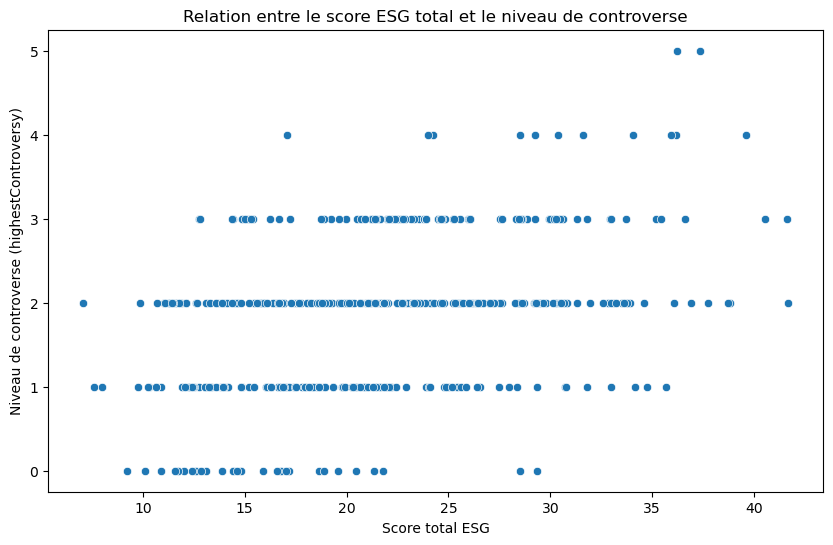

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'un scatter plot pour visualiser la relation entre totalEsg et highestControversy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='totalEsg', y='highestControversy', data=df)

plt.title('Relation entre le score ESG total et le niveau de controverse')
plt.xlabel('Score total ESG')
plt.ylabel('Niveau de controverse (highestControversy)')
plt.show()


In [19]:
# Calculer la moyenne du risque global par secteur
risk_by_sector = df.groupby('GICS Sector')['overallRisk'].mean().sort_values(ascending=False)

# Afficher les résultats
print("Risque global moyen par secteur :")
print(risk_by_sector)


Risque global moyen par secteur :
GICS Sector
Communication Services    6.928571
Consumer Discretionary    6.000000
Real Estate               5.892857
Consumer Staples          5.735294
Industrials               5.725806
Materials                 5.521739
Financials                5.215385
Energy                    5.000000
Health Care               5.000000
Information Technology    4.240741
Utilities                 3.857143
Name: overallRisk, dtype: float64


In [21]:
# Calculer la corrélation entre la capitalisation boursière et le niveau de risque global
correlation_marketCap_risk = df['marketCap'].corr(df['overallRisk'])

# Afficher le résultat
print(f"Corrélation entre la capitalisation boursière et le risque global : {correlation_marketCap_risk}")


Corrélation entre la capitalisation boursière et le risque global : -0.015977716757072855


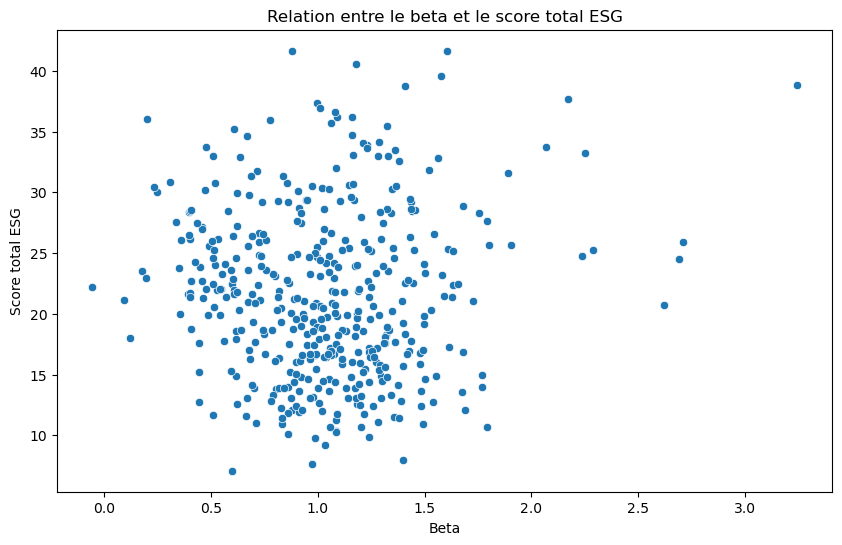

In [23]:
# Création d'un scatter plot pour visualiser la relation entre le beta et le score total ESG
plt.figure(figsize=(10, 6))
sns.scatterplot(x='beta', y='totalEsg', data=df)

plt.title('Relation entre le beta et le score total ESG')
plt.xlabel('Beta')
plt.ylabel('Score total ESG')
plt.show()


In [25]:
# Calculer la moyenne de la capitalisation boursière par secteur
market_cap_by_sector = df.groupby('GICS Sector')['marketCap'].mean().sort_values(ascending=False)

# Afficher les résultats
print("Capitalisation boursière moyenne par secteur :")
print(market_cap_by_sector)


Capitalisation boursière moyenne par secteur :
GICS Sector
Communication Services    3.336448e+11
Information Technology    2.672016e+11
Health Care               1.116227e+11
Consumer Discretionary    1.077275e+11
Consumer Staples          9.385595e+10
Financials                8.604578e+10
Energy                    7.835218e+10
Industrials               5.520156e+10
Real Estate               4.056408e+10
Utilities                 3.948625e+10
Materials                 3.200015e+10
Name: marketCap, dtype: float64


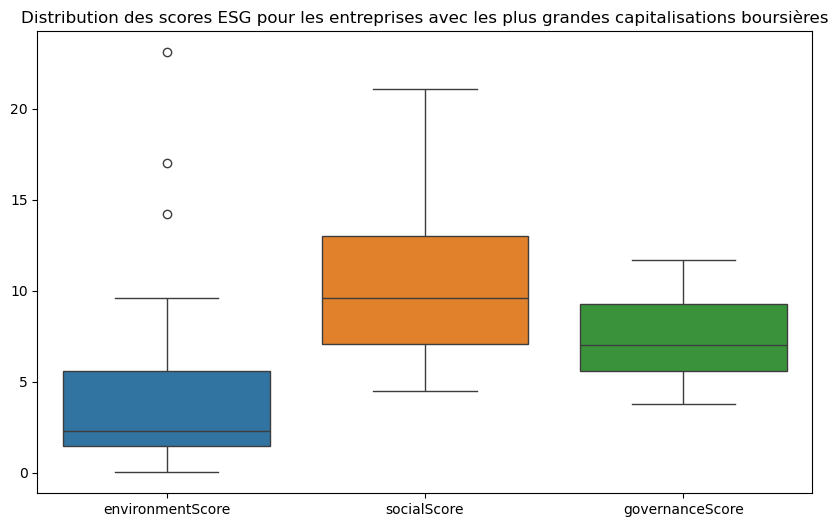

In [27]:
# Filtrer les entreprises avec les plus grandes capitalisations boursières (top 10%)
top_market_cap_threshold = df['marketCap'].quantile(0.90)
top_market_cap_companies = df[df['marketCap'] >= top_market_cap_threshold]

# Créer une boxplot des scores ESG pour ces entreprises
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_market_cap_companies[['environmentScore', 'socialScore', 'governanceScore']])

plt.title('Distribution des scores ESG pour les entreprises avec les plus grandes capitalisations boursières')
plt.show()


In [1]:
pip install nbconvert